In [1]:
import torch
from pathlib import Path
from siren.models.dcgan import Model as DCGAN
from siren.models.sirengan import Model as SIRENGAN
from siren.models.generate import walk

In [2]:
model = SIRENGAN(channels=1)
model.load(Path('../models/sirengan_mnist').expanduser())

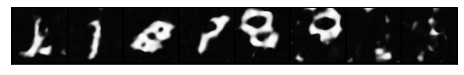

In [3]:
walk(
    model,
    torch.FloatTensor(1, 2),
    torch.randn(1, 2),
    torch.randn(1, 2),
    8,
    Path('../reports/figures/sirengan_mnist'))

In [4]:
from siren.shader.utils import dump, serialize

in_w = dump(model.G.main[0].linear.weight)
in_b = dump(model.G.main[0].linear.bias)
print(in_w)
print(in_b)

out_w = dump(model.G.main[-2].weight)
out_b = dump(model.G.main[-2].bias)
print(out_w)
print(out_b)

[[-0.22843868  0.03523429  0.06692632 -0.18129103]
 [-0.23853183 -0.20007999  0.15529396 -0.00310115]
 [ 0.03856763  0.02278085 -0.1529688   0.14311586]
 [-0.06332826  0.19999316 -0.14323334 -0.08326521]
 [-0.10162629 -0.10805619 -0.23467544  0.10179734]
 [-0.0228516   0.11369347  0.0677687   0.04336864]
 [-0.17907955  0.09186149  0.19771646  0.08641794]
 [ 0.01498406 -0.10948396 -0.08703084  0.1856751 ]
 [-0.08958362 -0.02782243  0.19594394  0.12824112]
 [-0.19046016 -0.18910964 -0.19993094 -0.04575124]
 [ 0.12951525 -0.23395884 -0.14149305  0.14143589]
 [ 0.09068367 -0.21170224  0.0246901  -0.22794056]
 [-0.2222682  -0.00378777  0.13598783 -0.13937344]
 [-0.02764416 -0.19955961 -0.22645847  0.09998773]
 [-0.19779462  0.09252436 -0.00348836 -0.08632792]
 [ 0.0685434   0.21747269  0.02726396 -0.23044169]
 [ 0.14276263 -0.19686417  0.19660603 -0.01119238]
 [-0.11331458 -0.04324644  0.05777826  0.04465916]
 [-0.0787252   0.0858623   0.19515833  0.12830767]
 [ 0.25792506 -0.10133125  0.09

In [5]:
serialize(model.G, 'f')

vec4 f0_0 = sin(
    p.x * vec4(-6.853,-7.156,1.157,-1.9) + 
    p.y * vec4(-1.057,6.002,-.6834,-6) + 
    p.z * vec4(2.008,4.659,-4.589,-4.297) + 
    p.w * vec4(-5.439,-.09303,4.293,-2.498) + 
    vec4(4.341,-3.359,14.06,12.84));
vec4 f0_1 = sin(
    p.x * vec4(-3.049,-.6855,-5.372,.4495) + 
    p.y * vec4(3.242,-3.411,-2.756,3.285) + 
    p.z * vec4(-7.04,2.033,5.931,-2.611) + 
    p.w * vec4(3.054,1.301,2.593,5.57) + 
    vec4(10.53,-1.021,-1.584,-10.33));
vec4 f0_2 = sin(
    p.x * vec4(-2.688,-5.714,3.885,2.721) + 
    p.y * vec4(.8347,5.673,7.019,6.351) + 
    p.z * vec4(5.878,-5.998,-4.245,.7407) + 
    p.w * vec4(3.847,-1.373,4.243,-6.838) + 
    vec4(3.616,4.471,14.09,-12.31));
vec4 f0_3 = sin(
    p.x * vec4(-6.668,-.8293,-5.934,2.056) + 
    p.y * vec4(.1136,5.987,-2.776,-6.524) + 
    p.z * vec4(4.08,-6.794,-.1047,.8179) + 
    p.w * vec4(-4.181,3,-2.59,-6.913) + 
    vec4(-7.524,-2.099,11.39,-9.35));
vec4 f0_4 = sin(
    p.x * vec4(4.283,-3.399,-2.362,7.738) + 
    p.y * 